In [58]:
import pandas as pd
import random
import os
import time
data = pd.read_csv("./CSV Rotas - Base de Dados.csv")
data.head()

,distancias,Faminas,Bar do Lu,Bar da fatinha,Praça do rosario,Bar do broa,Inove,Dule,Mansão gastropub,João pinheiro,Bar betinho,Hospital São Paulo,Armação,Cristo,Rei do cachorao,Santa marcelina,Cachorao do naldinho,Fest house,Lagoa da Gávea
0,João pinheiro,4.6,2.2,5.5,0.60,0.65,1.7,0.55,2.3,0.0,1.3,1.6,0.85,1.1,0.8,0.45,1.3,1.5,1.7
1,Faminas,0.0,4.3,3.5,4.80,5.20,3.7,4.30,4.1,4.6,5.3,4.7,4.10,4.2,5.1,4.50,5.6,5.5,4.2
2,Mansão gastropub,3.5,1.9,3.0,2.40,2.90,1.4,1.70,0.0,2.3,3.0,2.4,1.90,1.7,2.6,2.20,3.3,2.9,1.6
3,Bar da fatinha,3.5,2.6,0.0,4.30,4.70,3.3,4.30,3.0,4.2,4.8,4.7,3.90,3.3,4.5,3.60,5.0,5.1,3.4
4,Bar do broa,5.2,3.0,5.8,0.85,0.00,2.4,1.00,2.9,0.5,1.1,1.0,1.50,1.5,0.5,1.30,1.5,1.0,2.2


In [59]:
#Criando os diretorios de logs
def criar_diretorios(caminho):
    os.makedirs(caminho, exist_ok=True)
    print(f"Pasta '{caminho}' criada com sucesso!")


timestamp_atual = time.time()
criar_diretorios('logs')
criar_diretorios(f"logs/{timestamp_atual}-geracao")
criar_diretorios(f"logs/{timestamp_atual}-geracao/filhos")
criar_diretorios(f"logs/{timestamp_atual}-geracao/mutacoes")
criar_diretorios(f"logs/{timestamp_atual}-geracao/pais")
criar_diretorios(f"logs/{timestamp_atual}-geracao/populacoes")
criar_diretorios(f"logs/{timestamp_atual}-geracao/melhores-individuos")


print(f"Geracao - {timestamp_atual}")

Pasta 'logs' criada com sucesso!
Pasta 'logs/1718152834.3735588-geracao' criada com sucesso!
Pasta 'logs/1718152834.3735588-geracao/filhos' criada com sucesso!
Pasta 'logs/1718152834.3735588-geracao/mutacoes' criada com sucesso!
Pasta 'logs/1718152834.3735588-geracao/pais' criada com sucesso!
Pasta 'logs/1718152834.3735588-geracao/populacoes' criada com sucesso!
Pasta 'logs/1718152834.3735588-geracao/melhores-individuos' criada com sucesso!
Geracao - 1718152834.3735588


In [60]:
def calcular_fitness(rota):
    distancia_total = 0.0
    for i in range(len(rota) - 1):
        origem = rota[i]
        destino = rota[i + 1]
        distancia_total += data.loc[origem, destino]    
    return round(distancia_total, 3)


In [61]:
def selecao_por_torneio(populacao, tamanho_torneio):
    nova_populacao = []
    torneio = random.sample(populacao, tamanho_torneio)
    torneio.sort(key=lambda x: calcular_fitness(x))
    melhor_individuo = torneio[0]
    nova_populacao.append(melhor_individuo)
    return nova_populacao

In [62]:
#Pegando as localidades e setando a coluna 0 como index
localidades = data.columns[1:].tolist()
print("Localidades:", localidades)

data.set_index(data.columns[0], inplace=True)
print(data.loc['João pinheiro'])

Localidades: ['Faminas', 'Bar do Lu', 'Bar da fatinha', 'Praça do rosario', 'Bar do broa', 'Inove', 'Dule', 'Mansão gastropub', 'João pinheiro', 'Bar betinho ', 'Hospital São Paulo', 'Armação', 'Cristo', 'Rei do cachorao', 'Santa marcelina', 'Cachorao do naldinho', 'Fest house ', 'Lagoa da Gávea']
Faminas                 4.60
Bar do Lu               2.20
Bar da fatinha          5.50
Praça do rosario        0.60
Bar do broa             0.65
Inove                   1.70
Dule                    0.55
Mansão gastropub        2.30
João pinheiro           0.00
Bar betinho             1.30
Hospital São Paulo      1.60
Armação                 0.85
Cristo                  1.10
Rei do cachorao         0.80
Santa marcelina         0.45
Cachorao do naldinho    1.30
Fest house              1.50
Lagoa da Gávea          1.70
Name: João pinheiro, dtype: float64


In [63]:
novo_df = pd.DataFrame(columns=data.columns)
for localidade in localidades:
    if localidade in data.index:
        novo_df = pd.concat([novo_df, data.loc[[localidade]]], axis=0)
novo_df.head()



/tmp/ipykernel_50461/1519992901.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  novo_df = pd.concat([novo_df, data.loc[[localidade]]], axis=0)


,Faminas,Bar do Lu,Bar da fatinha,Praça do rosario,Bar do broa,Inove,Dule,Mansão gastropub,João pinheiro,Bar betinho,Hospital São Paulo,Armação,Cristo,Rei do cachorao,Santa marcelina,Cachorao do naldinho,Fest house,Lagoa da Gávea
Faminas,0.0,4.3,3.5,4.80,5.2,3.7,4.3,4.1,4.6,5.3,4.7,4.1,4.2,5.10,4.5,5.6,5.5,4.2
Bar do Lu,5.8,0.0,2.6,2.60,4.1,1.1,1.7,1.9,2.2,3.1,2.1,1.9,1.8,2.70,2.1,4.5,2.9,1.8
Bar da fatinha,3.5,2.6,0.0,4.30,4.7,3.3,4.3,3.0,4.2,4.8,4.7,3.9,3.3,4.50,3.6,5.0,5.1,3.4
Praça do rosario,7.5,2.2,4.3,0.00,0.8,1.5,1.2,2.4,1.0,0.5,1.7,1.5,1.2,0.29,0.9,0.8,1.8,1.8
Bar do broa,5.2,3.0,5.8,0.85,0.0,2.4,1.0,2.9,0.5,1.1,1.0,1.5,1.5,0.50,1.3,1.5,1.0,2.2


In [64]:
def save_log(file_name,individuos):
        with open(f"./logs/{timestamp_atual}-geracao/{file_name}.txt","w") as file:
            for i in individuos:
                fitnessCALC = calcular_fitness(i)
                file.write(str(fitnessCALC) + " "+', '.join(i) + '\n')


In [65]:
def individuo_ja_existe(pais, individuo):
    return individuo in pais

In [66]:
# Selecao dos individuos pais atravez do torneio

def selecao_pais(data, qtd_pais = 2, tamanho_torneio = 5):
    pais = []
    for i in range(qtd_pais):
        novo_individo = selecao_por_torneio(data, tamanho_torneio)
        while individuo_ja_existe(pais, novo_individo):
            novo_individo = selecao_por_torneio(data, tamanho_torneio)
        pais.extend(novo_individo)
    return pais



In [67]:
def crossover_ordem(pai1, pai2):
    tamanho = len(pai1)
    filho1, filho2 = [None]*tamanho, [None]*tamanho

    # 'Faminas' deve ser o primeiro e o último ponto
    filho1[0], filho1[-1] = 'Faminas', 'Faminas'
    filho2[0], filho2[-1] = 'Faminas', 'Faminas'

    # Escolher dois pontos de crossover entre 1 e tamanho-2
    ponto1, ponto2 = sorted(random.sample(range(1, tamanho-1), 2))

    # Copiar segmento de pai1 para filho1 e de pai2 para filho2
    filho1[ponto1:ponto2] = pai1[ponto1:ponto2]
    filho2[ponto1:ponto2] = pai2[ponto1:ponto2]

    def preencher_filho(filho, pai):
        pos_atual = ponto2 if ponto2 < tamanho - 1 else 1  # Iniciar após o segundo ponto de crossover, circular se necessário
        for gene in pai:
            if gene not in filho:
                # Pular o primeiro e o último índice que são 'Faminas'
                if pos_atual == 0 or pos_atual == tamanho - 1:
                    pos_atual = (pos_atual + 1) % tamanho
                # Verificar se a posição atual já está preenchida
                while filho[pos_atual] is not None:
                    pos_atual = (pos_atual + 1) % tamanho
                filho[pos_atual] = gene
                pos_atual = (pos_atual + 1) % tamanho

    # Preencher os filhos com os genes dos outros pais
    preencher_filho(filho1, pai2)
    preencher_filho(filho2, pai1)

    return filho1, filho2


In [68]:
def mutacao(filho, taxa_mutacao=0.1):
    # Verifica se a mutação ocorrerá com base na taxa de mutação
    if random.random() < taxa_mutacao:
        # Escolhe dois índices aleatórios entre 2 e 18
        indice1 = random.randint(2, 18)
        indice2 = random.randint(2, 18)
        
        # Garante que os índices sejam diferentes
        while indice1 == indice2:
            indice2 = random.randint(2, 18)
        
        # Troca os genes nos índices selecionados
        filho[indice1], filho[indice2] = filho[indice2], filho[indice1]
    
    return filho



In [69]:
def substituicao_eletista(p,f):
    fitness_populacao = [(individuo, calcular_fitness(individuo)) for individuo in p]
    # Ordena a população com base no fitness (do maior para o menor)
    fitness_populacao.sort(key=lambda x: x[1], reverse=True)
    num_melhores = 25
    melhores_individuos = [individuo for individuo, fitness in fitness_populacao[:num_melhores]]
    # Seleciona os 25 piores indivíduos
    piores_individuos = [individuo for individuo, fitness in fitness_populacao[num_melhores:]]

    for filho in f:
        indice_substituir = random.choice(range(len(piores_individuos)))
        piores_individuos[indice_substituir] = filho
    # Combina os melhores indivíduos com os piores indivíduos (alguns substituídos pelos filhos)
    nova_populacao = melhores_individuos + piores_individuos
    return nova_populacao

In [70]:
def melhor_individo_populacao(populacao):
    fitness_populacao = [(individuo, calcular_fitness(individuo)) for individuo in populacao]
    fitness_populacao.sort(key=lambda x: x[1], reverse=True)
    return fitness_populacao[-1]

In [71]:
#Criando o grade While responsavel por gerar as populacoes

#Iniciando a populacao
tamanho_populacao = 50
populacao = []

localidades = [loc for loc in localidades if loc != 'Faminas']  
populacao = []

for _ in range(tamanho_populacao):
    rota = ['Faminas'] + random.sample(localidades, len(localidades)) + ['Faminas']
    populacao.append(rota)

save_log('populacoes/0-populacao',populacao)
melhores_individuos = []
geracoes = 0 
while geracoes < 250: 
    #Pegando os pais para o cruzamento
    pais = selecao_pais(populacao)
    #save_log(f"pais/{geracoes}-geracao",pais)
    #Gerando os filhos apartir dos pais
    filhos = []
    for i in range(len(pais)):
        if ( i % 2 ) == 0:
            filho1, filho2 = crossover_ordem(pais[i], pais[i+1])
            filhos.append(filho1)
            filhos.append(filho2)
    #save_log(f"filhos/{geracoes}-geracao",filhos)

    #Aplicando a mutacao nos filhos
    for i, filho in enumerate(filhos):
        filhos[i] = mutacao(filho)
    #save_log(f"mutacoes/{geracoes}-mutacao",filhos)

    #Incluindo os filhos na populacao de forma elitista 
    populacao = substituicao_eletista(populacao,filhos)
    #save_log(f"populacoes/{geracoes+1}-populacao",populacao)
    melhores_individuos.append(melhor_individo_populacao(populacao))
    geracoes = geracoes + 1

    
def encontrar_melhor_de_todas_geracoes(individuos):
    individuos_ordenados = sorted(individuos, key=lambda x: x[1])
    return individuos_ordenados[0]

melhor_individuo = encontrar_melhor_de_todas_geracoes(melhores_individuos)

# Imprime o melhor indivíduo
print("Melhor Rota:", melhor_individuo)

with open(f"./logs/{timestamp_atual}-geracao/melhores-individuos/melhores.txt","w") as file:
    for i in melhores_individuos:
        file.write(f"{i} \n")
    file.write(f"\n\n-------Melhor individuo-------\n\n {melhor_individuo} \n")

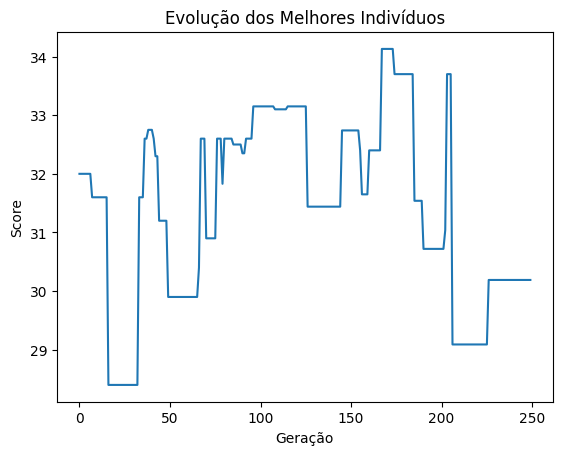

In [ ]:
import matplotlib.pyplot as plt

# Extrair os scores para plotagem
scores = [individuo[1] for individuo in melhores_individuos]

# Criar o gráfico
plt.plot(scores)
plt.title('Evolução dos Melhores Indivíduos')
plt.xlabel('Geração')
plt.ylabel('Score')
plt.show()
